# DIY Monte Carlo!!!

Here you will setup and run a monte carlo analysis from scratch - no more shift+enter!!!


The workflow here is almost identical to the ``freyberg_k_r_mc activity`` - its not cheating to use that activity for guidance

In [18]:
%matplotlib inline
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyemu
import platform
if 'window' in platform.platform().lower():
    newln='\n'
    ppp = 'pest++ '
else:
    newln='\r\n'
    ppp = './pestpp '

In [19]:
base_dir = os.path.join("..","..","models","Freyberg","Freyberg_zones")
assert os.path.exists(base_dir)
[shutil.copy2(os.path.join(base_dir,f),f) for f in os.listdir(base_dir)];

In [20]:
#step 0 - create a pyemu Monte Carlo object
mc = pyemu.MonteCarlo(pst="freyberg_zones.pst")

In [21]:
#step 1 - make draws with the Monte Carlo object
mc.draw(1000)

<module 'numpy' from '/Users/jwhite/anaconda/lib/python3.5/site-packages/numpy/__init__.py'>


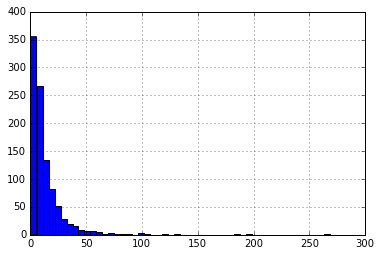

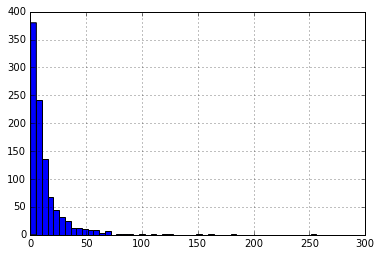

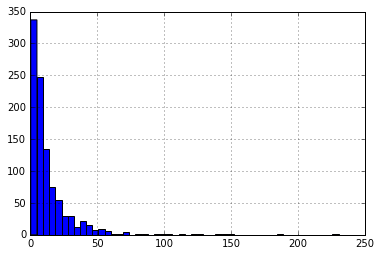

In [23]:
#step 2 - visualize a few parameter histograms via the parensemble attribute
print(np)
for par in mc.pst.adj_par_names[:3]:
    fig = plt.figure()
    ax = plt.subplot(111)
    mc.parensemble.loc[:,par].hist(ax=ax,bins=50)
plt.show()

In [24]:
# step 3 - save the parensemble to "sweep_in.csv"
mc.parensemble.to_csv("sweep_in.csv")

In [25]:
# step 4 - call the pyemu slave helper to run the ensemble via sweep - 
# please just copy this from freyebrg_k_r_mc notebook and change the name of the pst file
pyemu.helpers.start_slaves(base_dir,"sweep","freyberg_zones.pst",num_slaves=20,master_dir='.')

In [31]:
# step 5 - import the model outputs from the sweep (sweep_out.csv)
# and drop any failed runs
df = pd.read_csv("sweep_out.csv")
df = df.loc[df.failed_flag==0,:] 

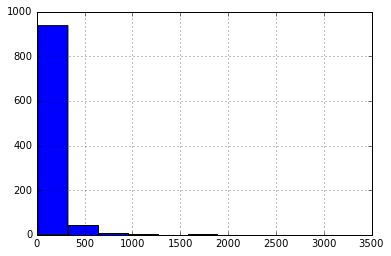

In [32]:
# step 6 - plot phi, filter based on "acceptable" phi
df.loc[:,"phi"].hist()

In [45]:
# step 7 - plot filtered and unfiltered forecast historgrams
acceptable_phi = 40.0
good_enough = df.loc[df.phi<acceptable_phi].index.values
print(good_enough)

[ 28  43  90 100 107 117 118 119 125 129 134 164 166 191 206 233 234 243
 248 251 252 265 267 277 283 287 294 307 311 314 318 337 340 341 349 352
 354 357 372 374 375 380 386 388 397 402 412 414 415 421 425 430 464 468
 477 491 505 535 537 546 549 558 560 567 579 590 592 608 609 612 616 619
 620 622 625 631 635 647 669 684 689 694 701 702 707 715 721 728 741 761
 766 769 782 790 795 811 818 823 826 840 845 847 858 862 878 891 892 922
 936 940 945 952 957 960 970 974 983 997]


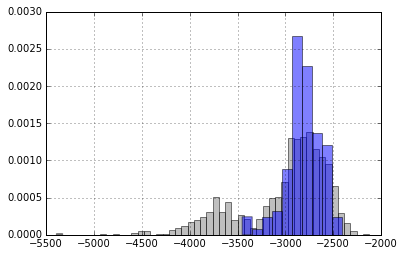

In [46]:
fig = plt.figure()
ax = plt.subplot(111)
df.loc[:,"RIVFLUX_FORE"].hist(ax=ax,alpha=0.5,color="0.5",normed=True,bins=50)
df.loc[good_enough,"RIVFLUX_FORE"].hist(ax=ax,alpha=0.5,color='b',normed=True)
plt.show()

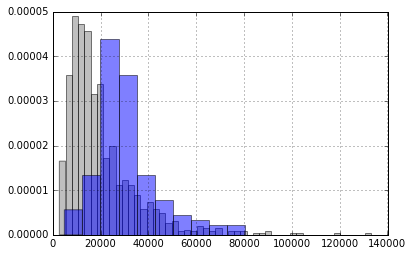

In [47]:
fig = plt.figure()
ax = plt.subplot(111)
df.loc[:,"TRAVEL_TIME"].hist(ax=ax,alpha=0.5,color="0.5",normed=True,bins=50)
df.loc[good_enough,"TRAVEL_TIME"].hist(ax=ax,alpha=0.5,color='b',normed=True)
plt.show()

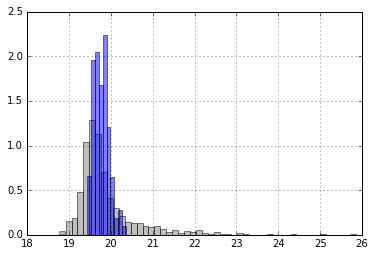

In [49]:
fig = plt.figure()
ax = plt.subplot(111)
df.loc[:,"FR03C16"].hist(ax=ax,alpha=0.5,color="0.5",normed=True,bins=50)
df.loc[good_enough,"FR03C16"].hist(ax=ax,alpha=0.5,color='b',normed=True)
plt.show()

In [48]:
mc.pst.pestpp_options["forecasts"]

'rivflux_fore,travel_time,fr03c16,fr04c9'